Importing required packages

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Reading the data

In [ ]:
df = pd.read_csv('/content/stock_tweets.csv')
df

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.


In [ ]:
df.describe()


,Date,Tweet,Stock Name,Company Name
count,80793,80793,80793,80793
unique,64424,64479,25,25
top,2022-07-07 18:32:41+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,14,25,37422,37422


Adding a new column named "sentiment"

In [ ]:
df1 = df.copy()
df1["sentiment"] = ''
df1.head()

,Date,Tweet,Stock Name,Company Name,sentiment
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",


Dropping the unnecessary columns for the sentiment analysis from tweets

In [ ]:
df1 = df1.drop(["Date","stock Name","Company Name"],axis = 1)

In [ ]:
df1


Data preprocessing and cleaning

In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
df1.Tweet = df1['Tweet'].apply(data_processing)

Removing Duplicates

In [ ]:
df1 = df1.drop_duplicates('Tweet')

Performing Stemming on the tweets,using PorterStemmer()

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


In [ ]:
df1['Tweet'] = df1['Tweet'].apply(lambda x: stemming(x))

<ipython-input-57-dc8eb5b76432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tweet'] = df1['Tweet'].apply(lambda x: stemming(x))


In [ ]:
df1.head()

,Tweet
0,mainstream media done amazing job brainwashing...
1,tesla delivery estimates around 364k analysts ...
2,3 even include 630m unvested rsus 630 addition...
3,realdanodowd holemarsblog tesla hahaha still t...
4,realdanodowd tesla stop trying kill kids sad d...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63902 entries, 0 to 80792
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   63902 non-null  object
dtypes: object(1)
memory usage: 998.5+ KB


In [ ]:
Adding polarity from NLP library textblob which descibes the sentiment of the tweet by giving avalue in range (-1,1) to corresponding tweet

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df1['polarity'] = df1['Tweet'].apply(polarity)

<ipython-input-61-cc930c2833bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['polarity'] = df1['Tweet'].apply(polarity)


In [ ]:
df1.head(10)

,Tweet,polarity
0,mainstream media done amazing job brainwashing...,0.600000
1,tesla delivery estimates around 364k analysts ...,0.000000
2,3 even include 630m unvested rsus 630 addition...,0.018182
3,realdanodowd holemarsblog tesla hahaha still t...,0.066667
4,realdanodowd tesla stop trying kill kids sad d...,-0.200000
5,realdanodowd tesla,0.000000
6,years holemarsblog viciously silenced tesla cr...,-0.362500
7,nio im money doesnt mean bad investment whole ...,0.077902
8,50 likes spy tsla charts study,0.000000
9,mrjames__321 kellyroofing teslasolar elonmusk ...,-0.700000


classifying the tweet based on polarity values

In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
df1['sentiment'] = df1['polarity'].apply(sentiment)

<ipython-input-64-51a1620a37ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = df1['polarity'].apply(sentiment)


In [ ]:
df1.head()

,Tweet,polarity,sentiment
0,mainstream media done amazing job brainwashing...,0.600000,Positive
1,tesla delivery estimates around 364k analysts ...,0.000000,Neutral
2,3 even include 630m unvested rsus 630 addition...,0.018182,Positive
3,realdanodowd holemarsblog tesla hahaha still t...,0.066667,Positive
4,realdanodowd tesla stop trying kill kids sad d...,-0.200000,Negative


Visual representation after classifying the tweets

<Axes: xlabel='sentiment', ylabel='count'>

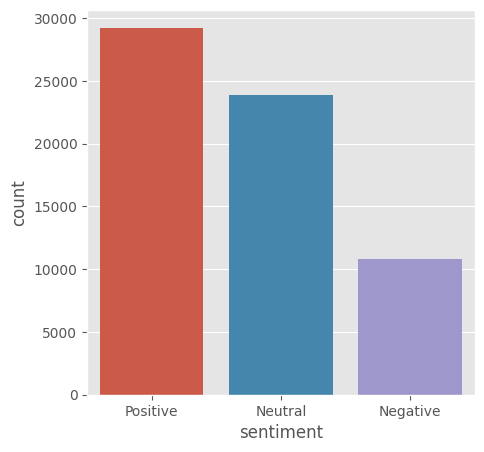

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df1)


Top 5 positive tweets based on above division

In [ ]:
pos_tweets = df1[df1.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Tweet,polarity,sentiment
15946,self driving team tesla insanely impressive,1.0,Positive
6430,week 700 support strength tsla buyers awesome see,1.0,Positive
55478,kruesports iqoption aoruslatam amd twitchlatam...,1.0,Positive
11566,tesla best car world,1.0,Positive
4751,best lcid tsla source,1.0,Positive


Top 5 Negative tweets

In [ ]:
neg_tweets = df1[df1.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Tweet,polarity,sentiment
31391,2some argue tsla price doesnt matter true seco...,-3.469447e-18,Negative
18647,gas prices past 18 months russia invaded ukrai...,-4.625929e-18,Negative
11191,revenge best served cold think time jeffbezos ...,-5.551115e-18,Negative
69842,nice round vs tsm sorry bars thought fixed,-6.938894e-18,Negative
26141,elon try slow make employees rest bit near end...,-1.040834e-17,Negative


Top 5 neutral tweets

In [ ]:
neutral_tweets = df1[df1.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Tweet,polarity,sentiment
1,tesla delivery estimates around 364k analysts ...,0.0,Neutral
56564,remember aapl investors september 7 2022,0.0,Neutral
56597,aapl reportedly issues getting employees retur...,0.0,Neutral
56588,apple monopolize tsmcs 3nanometer mfg info pac...,0.0,Neutral
56582,gm everyone yall rush tell log go vacay wanted...,0.0,Neutral
